# Dataset of Titanic:

- PassengerId: identificador único del pasajero.

- Survived: si el pasajero sobrevivió al naufragio, codificada como 0 (no) y 1 (si). Esta es la variable respuesta que interesa predecir.

- Pclass: clase a la que pertenecía el pasajero: 1, 2 o 3.

- Name: nombre del pasajero.

- Sex: sexo del pasajero.

- Age: edad del pasajero.

- SibSp: número de hermanos, hermanas, hermanastros o hermanastras en el barco.

- Parch: número de padres e hijos en el barco.

- Ticket: identificador del billete.

- Fare: precio pagado por el billete.

- Cabin: identificador del camarote asignado al pasajero.

- Embarked: puerto en el que embarcó el pasajero.

# Import Library

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Import Data and Explore

In [90]:
#Import data from csv
train_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/random-forest-project-tutorial/main/titanic_train.csv', sep=",")
 

In [91]:
#Let's see how many rows and columns does my train_data has.
print("Train Data Shape: " ,train_data.shape)

Train Data Shape:  (891, 12)


In [92]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Observations:

- We can see that our train_data has 891 rows and 12 columns.

- Our data has 7 numerical features and 5 categorical features.

- Feature 'Age' has 714 non-null values from a total of 891 rows, which means that our 'Age' column has 177 null values. 
- The same happens with our 'Cabin' feature having 687 null values, and 'Embarked' feature with 2 null values.

## Note: age have 80% of info

# Explore Train Data

In [93]:
train_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
676,677,0,3,"Sawyer, Mr. Frederick Charles",male,24.5,0,0,342826,8.0500,NaN,S
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
758,759,0,3,"Theobald, Mr. Thomas Leonard",male,34.0,0,0,363294,8.0500,NaN,S
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5000,A26,C
545,546,0,1,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,693,26.0000,NaN,S
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,NaN,S
797,798,1,3,"Osman, Mrs. Mara",female,31.0,0,0,349244,8.6833,NaN,S
588,589,0,3,"Gilinski, Mr. Eliezer",male,22.0,0,0,14973,8.0500,NaN,S
214,215,0,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,NaN,Q


In [94]:
#Change datatype
train_data['Survived']=pd.Categorical(train_data['Survived'])
train_data['Sex']=pd.Categorical(train_data['Sex'])
train_data['Embarked']=pd.Categorical(train_data['Embarked'])


In [95]:
train_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


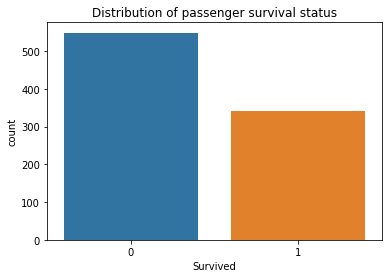

In [96]:
#Let's first visualize the distribution of our target variable.

sns.countplot(x=train_data['Survived'])
plt.title('Distribution of passenger survival status')
plt.show()

In [97]:
#Let investigate about sex and survived
mn = train_data[(train_data["Sex"]=="male") & (train_data["Survived"]==0)]
fn = train_data[(train_data["Sex"]=="female") & (train_data["Survived"]==0)]
ms = train_data[(train_data["Sex"]=="male") & (train_data["Survived"]==1)]
fs = train_data[(train_data["Sex"]=="female") & (train_data["Survived"]==1)]
mn = len(mn)
fn = len(fn)
ms = len(ms)
fs = len(fs)
print(f"Men-NoS:{mn}, Men-S:{ms}, Men-Tot:{mn+ms}, Survived%: {round((ms/(mn+ms))*100)}")
print(f"Fem-NoS:{fn}, Fem-S:{fs}, Fem-Tot:{fn+fs}, Survived%: {round((fs/(fn+fs))*100)}")

Men-NoS:468, Men-S:109, Men-Tot:577, Survived%: 19
Fem-NoS:81, Fem-S:233, Fem-Tot:314, Survived%: 74


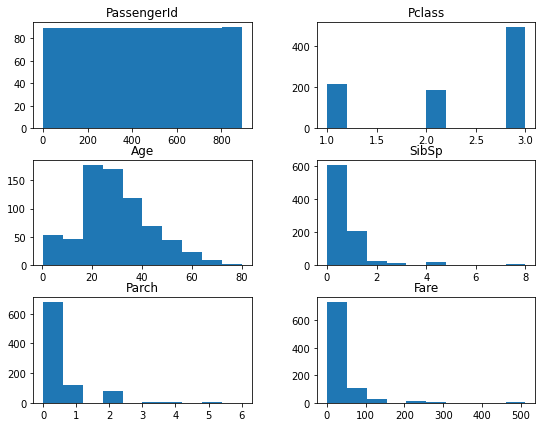

In [98]:
train_data.hist(bins=10,figsize=(9,7),grid=False);
plt.show()

## Countplot for categorical variables

In [99]:
#Let's check the categories in each of our object type features

def countplot_features(feature):
    plot=sns.countplot(x=feature,data=train_data)
    plt.show()

def countplot_targetvsfeature(feature,y):
    fig = plt.figure(figsize=(10,5))
    plot=sns.countplot(x=feature,data=train_data,hue=y)
    plt.show()    

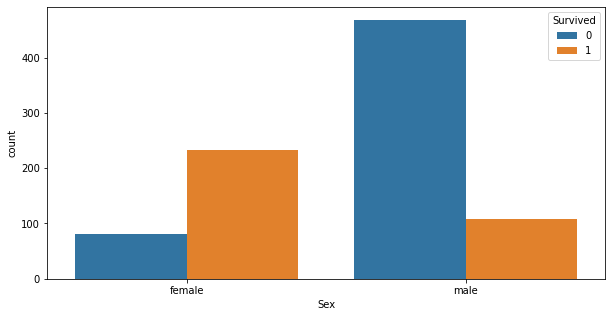

In [100]:
countplot_targetvsfeature('Sex','Survived')

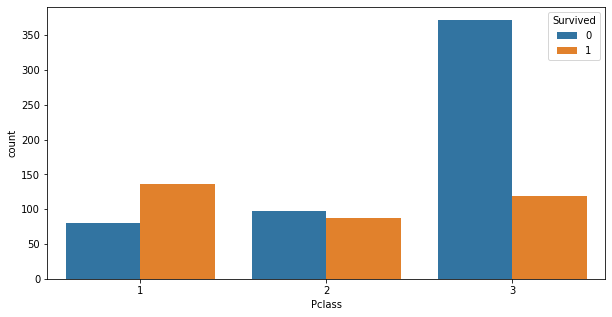

In [101]:
countplot_targetvsfeature('Pclass','Survived')

Observations: Most of the passengers were travelling in the third class, but most of them did not survive. However, in the first class, most of the passengers survived.

# Distribution Plots for Continuous variables
In the hist see that age, have a normal distrbution. Now Plot to show this

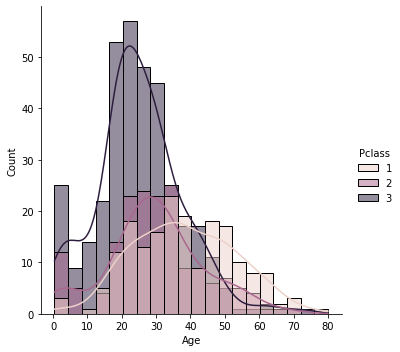

In [102]:
#Let's plot the Probability Density Function (PDF) of Age of 891 passengers traveling in the Titanic.
#kde=True show the density, if use kind="kde" show only the density
sns.displot(data =train_data,x='Age', hue='Pclass', kde=True)

(0.0, 1.05)

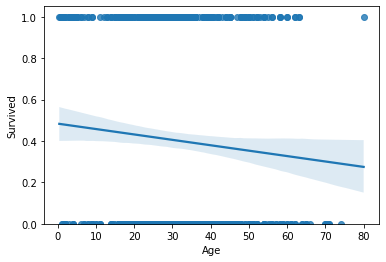

In [103]:
sns.regplot(x = "Age", y = "Survived", data = train_data)
plt.ylim(0,)

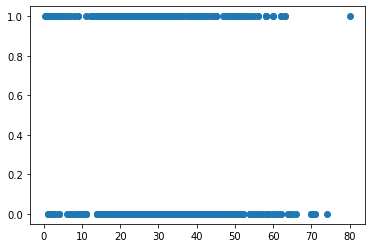

In [104]:
plt.scatter(x = "Age", y = "Survived", data = train_data)

Observations:

There is clear negative linear relation between Age and our target variable. This makes sense considering that children was one of the groups who had preference in using the boats to survive (Survive = 1).

(0.0, 2.1523032333509544)

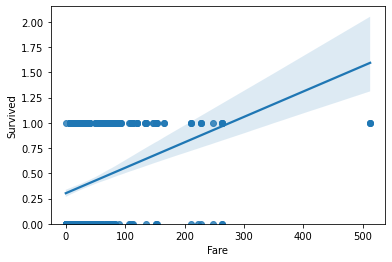

In [105]:
# View if there is a linear relation between continuous numerical variable Fare & target variable Survived.

sns.regplot(x = "Fare", y = "Survived", data = train_data)
plt.ylim(0,)

Observations:

Yes, there is a positive linear relation between 'Fare' and 'Survived' feature which means that people who paid a more expensive fare had more probabilities to survive (Survive = 1).

In [106]:
#DV = variable a pronosticar o variable dependiente
#IV = variable explicativas o variables independientes

# Studie None values or duplicates

In [107]:
#Search to duplicate data
train_duplicates = train_data['PassengerId'].duplicated().sum()
train_duplicates

0

In [108]:
#Eliminating irrelevant data, not use
drop_cols = ['PassengerId','Cabin', 'Ticket', 'Name']
train_data.drop(drop_cols, axis = 1, inplace = True)


# Plotting different features against one other

## What is a Correlation Coefficient? 
A coefficient of correlation is a value between -1 and +1 that denotes both the strength and directionality of a relationship between two variables. 
- The closer the value is to 1 (or -1), the stronger a relationship. 
- The closer a number is to 0, the weaker the relationship. 
- A negative coefficient will tell us that the relationship is negative, meaning that as one value increases, the other decreases. Similarly, a positive coefficient indicates that as one value increases, as does the other.

In [109]:
matrix = train_data.corr()
print(matrix)

          Pclass       Age     SibSp     Parch      Fare
Pclass  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age    -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp   0.083081 -0.308247  1.000000  0.414838  0.159651
Parch   0.018443 -0.189119  0.414838  1.000000  0.216225
Fare   -0.549500  0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

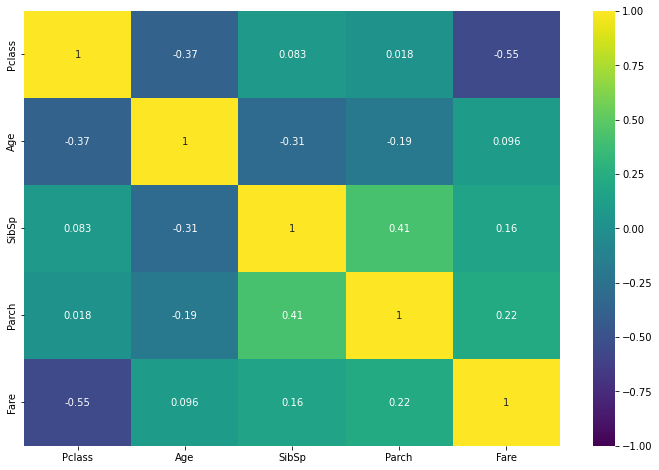

In [110]:
#Plotting a heatmap to find relations between features

plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True,cmap='viridis', vmax=1, vmin=-1, center=0)

Observations:

Here you can infer that there is a strong negative relation between Fare and PClass. This is totally understandable because if a passenger instead of buying a ticket in 1st class (PClass = 1), decided to buy a ticket in 3rd class (PClass = 3), the ticket fare would certainly decrease.

There is also a negative relation between the passenger class (pclass) and the age of the passenger. That means that 3rd class (Pclass = 3) had younger passengers than the 1st class (Pclass = 1).

Also, we can see that Pclass is very related to the target variable 'Survived'. So the better passenger class, more probabilities to survive. We can confirm this relationship with the following graph.

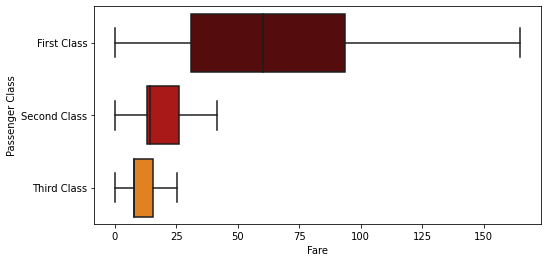

In [111]:
#Checking correlation between Pclass and Fare:
plt.figure(figsize = (8, 4))
sns.boxplot(y = train_data.Pclass, x = train_data.Fare, orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel('Passenger Class')
plt.yticks([0,1,2], ['First Class','Second Class', 'Third Class'])
plt.show()

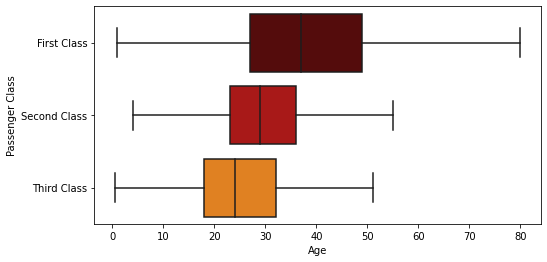

In [112]:
#Checking correlation between Pclass and Age:
#The parameter showfliers = False is ignoring the outliers. But if we do not establish that parameter, we can use boxplots to view outliers.
plt.figure(figsize = (8, 4))
sns.boxplot(y = train_data.Pclass, x = train_data.Age, orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel('Passenger Class')
plt.yticks([0,1,2], ['First Class','Second Class', 'Third Class'])
plt.show()

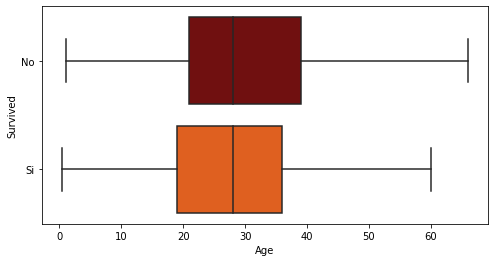

In [113]:
#Checking correlation between Survived and Age:
plt.figure(figsize = (8, 4))
sns.boxplot(y = train_data.Survived, x = train_data.Age, orient = 'h', showfliers = False, palette = 'gist_heat')
plt.ylabel('Survived')
plt.yticks([0,1], ['No','Si'])
plt.show()

# OUTLIERS

Observations: According to our statistics dataframe, everything seems normal except for the 'Fare' column which has a mean of 32.20 but its 50% percentile is 14, and its max value is 512. We could say 512 seems to be an outlier but it could be a typing error. It is also possible that the most expensive ticket had that price. It would be useful if we do some research and confirm that information.

Text(0, 0.5, 'Fare')

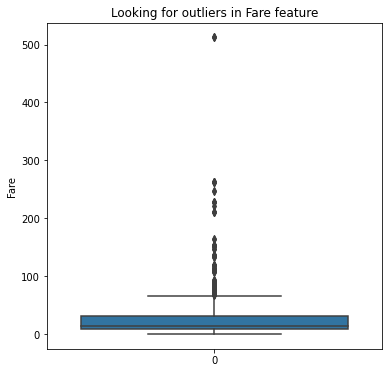

In [114]:
#Let's evaluate our 'Fare' variable.
plt.figure(figsize=(6,6))
sns.boxplot(data=train_data['Fare'])
plt.title('Looking for outliers in Fare feature')
plt.ylabel('Fare')

In [115]:
fare_stat = train_data['Fare'].describe()
fare_stat

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [116]:
IQR = fare_stat['75%']-fare_stat['25%']
upper = fare_stat['75%'] + 1.5*IQR
lower = fare_stat['25%'] - 1.5*IQR
print('The upper & lower bounds for suspected outliers are {} and {}.'.format(upper,lower))

The upper & lower bounds for suspected outliers are 65.6344 and -26.724.


Based on this results, we should drop Fare values above 65. However, our criteria is very important here, and based on the prices we saw in the boxplot the most extreme values are above 300. Let's see how many values represent that extreme value of 512 and drop them.

In [117]:
#visualizing data with fare above 300
train_data[train_data['Fare'] > 300]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,female,35.0,0,0,512.3292,C
679,1,1,male,36.0,0,1,512.3292,C
737,1,1,male,35.0,0,0,512.3292,C


In [118]:
#Dropping data with fare above 300
train_data.drop(train_data[(train_data['Fare'] > 300)].index, inplace=True)

In [119]:
#drop 3 outliers
train_data.shape

(888, 8)

# MISSING VALUES

In [120]:
#get the amount missing values per columns
train_data[train_data.columns].isnull().sum().sort_values(ascending=False)

Age         177
Embarked      2
Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
dtype: int64

In [121]:
#get the percentage of missing values in each column
train_data[train_data.columns].isnull().sum().sort_values(ascending=False)/len(train_data)

Age         0.199324
Embarked    0.002252
Survived    0.000000
Pclass      0.000000
Sex         0.000000
SibSp       0.000000
Parch       0.000000
Fare        0.000000
dtype: float64

In [122]:
# Handling Missing Values in train_data

## Fill missing AGE with Median of the survided and not survided is the same
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

## Fill missing EMBARKED with Mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

train_data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,888.000000,888.000000,888.000000,888.000000,888.000000
mean,2.313063,29.341408,0.524775,0.381757,30.582164
std,0.834007,13.037026,1.104186,0.806949,41.176366
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,30.771850
max,3.000000,80.000000,8.000000,6.000000,263.000000


# New Feature

In [123]:
# We will create a new column to show how many family members of each passenger were in the Titanic.
# We will calculate it based on the sum of SibSp (siblings and spouse) and Parch  (parents and children)

print(train_data)

train_data["fam_mbrs"] = train_data["SibSp"] + train_data["Parch"]

print(train_data)

    Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0          0       3    male  22.0      1      0   7.2500        S
1          1       1  female  38.0      1      0  71.2833        C
2          1       3  female  26.0      0      0   7.9250        S
3          1       1  female  35.0      1      0  53.1000        S
4          0       3    male  35.0      0      0   8.0500        S
..       ...     ...     ...   ...    ...    ...      ...      ...
886        0       2    male  27.0      0      0  13.0000        S
887        1       1  female  19.0      0      0  30.0000        S
888        0       3  female  28.0      1      2  23.4500        S
889        1       1    male  26.0      0      0  30.0000        C
890        0       3    male  32.0      0      0   7.7500        Q

[888 rows x 8 columns]
    Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  fam_mbrs
0          0       3    male  22.0      1      0   7.2500        S         1
1          1      

# FEATURE ENCODING FOR CATEGORICAL VARIABLES

Feature encoding is the process of turning categorical data in a dataset into numerical data. It is essential that we perform feature encoding because most machine learning models can only interpret numerical data and not data in text form.

In [124]:
#Train data

# Encoding the 'Sex' column
train_data['Sex'] = train_data['Sex'].apply(lambda x: 1 if x == 'male' else 0)

# Encoding the 'Embarked' column
train_data['Embarked'] = train_data['Embarked'].map({'S' : 0, 'C': 1, 'Q': 2})


In [125]:
#Verifying all our features are now numbers

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,fam_mbrs
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,1,1
2,1,3,0,26.0,0,0,7.9250,0,0
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,0


#FEATURE SCALING

So now that we have all our features converted into numbers, are they ready for modeling? It depends if all our features are on the same scale or not. To read what does it mean to have different scales and the methods to standarize them, go to the following link

In [126]:
from sklearn.preprocessing import MinMaxScaler


In [127]:
scaler = MinMaxScaler()

In [128]:
train_scaler = scaler.fit(train_data[['Age','Fare']])
train_data[['Age','Fare']] = train_scaler.transform(train_data[['Age','Fare']])

In [129]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,fam_mbrs
0,0,3,1,0.271174,1,0,0.027567,0,1
1,1,1,0,0.472229,1,0,0.271039,1,1
2,1,3,0,0.321438,0,0,0.030133,0,0
3,1,1,0,0.434531,1,0,0.201901,0,1
4,0,3,1,0.434531,0,0,0.030608,0,0


# MODEL USING DESICION TREE


In [134]:
X = train_data[list(train_data.columns[1:9])]
y = train_data[['Survived']]


In [135]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=34)

In [136]:
accuracies = list()
nro_feature = X_train.columns.size
depth_range = range(1, nro_feature+1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    tree_model = DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             random_state=0)
    tree_model.fit(X_train, y_train)
    accuracies.append(tree_model.score(X_test, y_test))
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.779279
         2          0.779279
         3          0.788288
         4          0.797297
         5          0.815315
         6          0.801802
         7          0.810811
         8          0.806306


In [137]:
clf = DecisionTreeClassifier(criterion='entropy',
                             min_samples_split=20,
                             min_samples_leaf=5,
                             random_state=0, max_depth=5)

clf.fit(X_train, y_train)
print('Accuracy:',clf.score(X_test, y_test))

Accuracy: 0.8153153153153153


In [139]:
# tree.feature_importances_ es un vector con la importancia estimada de cada atributo
for name, importance in zip(train_data.columns[1:], clf.feature_importances_):
    print(name + ': ' + str(importance))

Pclass: 0.1876471374408895
Sex: 0.46502900667874203
Age: 0.1032823198415946
SibSp: 0.050371591664837595
Parch: 0.0
Fare: 0.1396659054733688
Embarked: 0.05400403890056743
fam_mbrs: 0.0


In [141]:
#show predicted dataset
clf_pred=clf.predict(X_test)

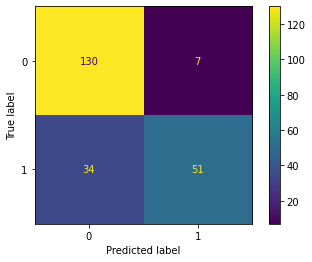

In [142]:
cm = confusion_matrix(y_test, clf_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

plt.show()

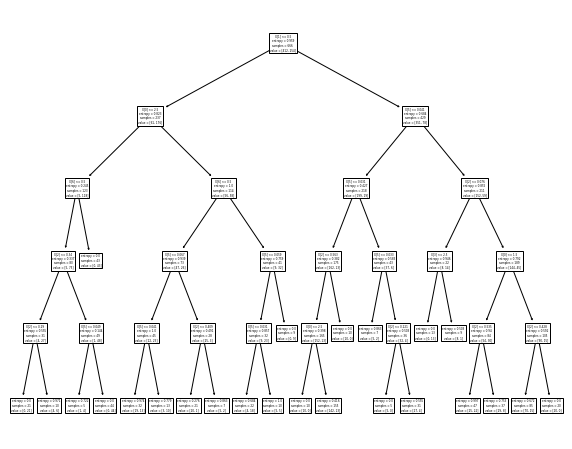

In [143]:
plt.figure(figsize=(10,8))
plot_tree(clf)
plt.show()

## VERSION WiTHOUT COLUMN

In [145]:
X2 = train_data[['Pclass','Sex','Age']]
y2 = train_data[['Survived']]

#Split the data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, stratify=y2,random_state=34)

In [164]:
clf2 = DecisionTreeClassifier(criterion='entropy',
                             min_samples_split=20,
                             min_samples_leaf=20,
                             random_state=0, max_depth=5)

clf2.fit(X2_train, y2_train)
print('Accuracy:',clf2.score(X2_test, y2_test))

Accuracy: 0.7882882882882883


In [165]:
#show predicted dataset
clf2_pred=clf2.predict(X2_test)

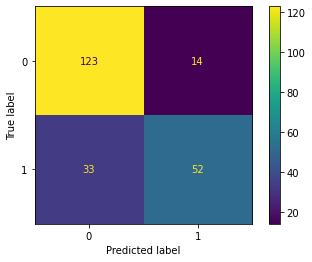

In [166]:
cm2 = confusion_matrix(y2_test, clf2_pred, labels=clf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=clf2.classes_)
disp.plot()

plt.show()

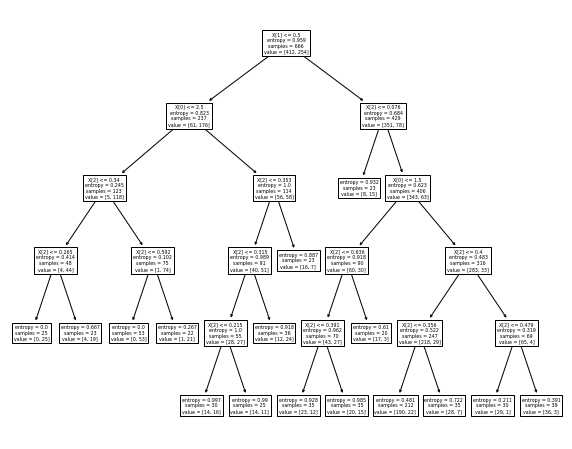

In [167]:
plt.figure(figsize=(10,8))
plot_tree(clf2)
plt.show()